In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.nn import functional as F

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
A = torch.randn(2,3).to(device)
B = torch.randn(3,2).to(device)

In [4]:
A.matmul(B)

tensor([[1.8647, 1.4215],
        [2.1710, 1.7930]], device='cuda:0')

In [5]:
A

tensor([[-0.7502, -1.0280, -0.0856],
        [-1.3487, -0.8166,  0.3449]], device='cuda:0')

In [6]:
linear1 = nn.Linear(10,2)
linear1(torch.randn(1,10))

tensor([[ 0.6685, -0.1666]], grad_fn=<AddmmBackward0>)

In [7]:
m = nn.Dropout(p=0.2)
input = torch.randn(20, 16)
output = m(input)
output

tensor([[ 0.1055,  1.5237, -0.2119,  0.4052, -1.2212, -0.7306,  0.6638, -0.1780,
         -0.1372, -0.5719, -2.0239,  0.1590, -0.6945, -0.0938,  0.0000,  0.0412],
        [ 0.0000, -0.5686,  0.8006,  0.6165, -0.0091,  0.0000, -0.0000,  0.5791,
         -0.0000, -0.2656,  0.0000,  0.0212,  1.4188,  0.0679,  0.6521, -0.0000],
        [ 0.0000, -0.0000, -1.2595, -0.0000, -0.0150,  0.1647, -1.3938, -1.0548,
         -0.0000,  0.8816, -0.0000,  0.7879,  2.8521, -0.0000, -0.0000,  1.3728],
        [ 1.3198, -2.2626, -0.0518, -2.0295, -0.0000, -0.0000,  0.4568, -1.0019,
         -0.6320,  0.6971, -1.9874, -0.8537,  1.2918, -0.8180, -0.0473,  0.0000],
        [-0.4611, -1.3941,  0.8285, -2.3725, -1.7925,  2.2529,  0.0000, -0.1245,
          2.0073, -0.0000,  2.2584, -1.3018, -1.4481,  0.0000,  0.0000, -3.3700],
        [ 0.4190, -1.4309,  1.9649,  2.5206, -0.4729,  1.4849,  0.6458, -1.6415,
          2.7351, -1.7653,  1.8029,  1.6666, -0.0089, -0.0000,  0.7846,  2.1505],
        [ 0.0000, -0.5

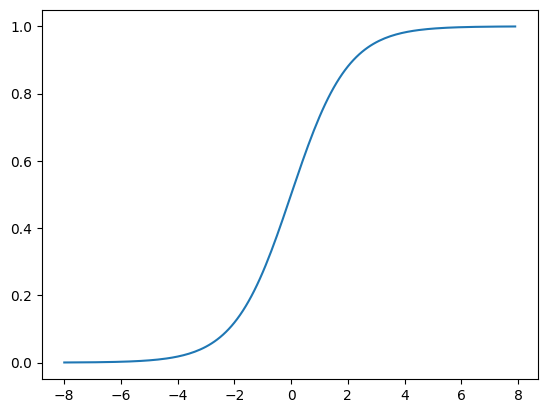

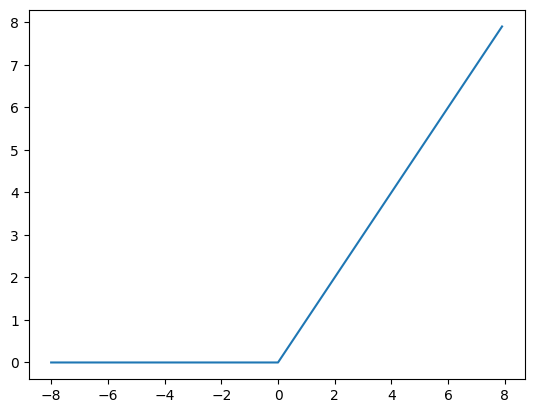

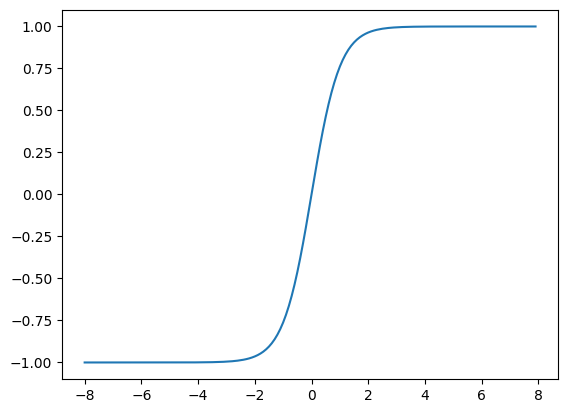

In [8]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
plt.plot(x.detach(),torch.sigmoid(x).detach())
plt.figure()
plt.plot(x.detach(),torch.relu(x).detach())
plt.figure()
plt.plot(x.detach(),torch.tanh(x).detach())

In [9]:
net = nn.Sequential(nn.Linear(20, 256), nn.ReLU(), nn.Linear(256, 10))
X = torch.rand(2, 20)
Y = net(X)
Y

tensor([[ 0.1052, -0.1230, -0.0706, -0.0148,  0.1070,  0.1261,  0.1034,  0.1014,
          0.0381,  0.1690],
        [ 0.1595, -0.0191, -0.0943,  0.0240,  0.2006,  0.1655,  0.0540,  0.0581,
         -0.0809,  0.1252]], grad_fn=<AddmmBackward0>)

In [13]:
onnx_filename = "model.onnx"
torch.onnx.export(
    net,                 # PyTorch model
    X,                   # Example input tensor
    onnx_filename,       # Output file
    input_names=["input"],
    output_names=["output"],
    dynamic_axes={"input": {0: "batch_size"}, "output": {0: "batch_size"}},  # Optional for dynamic batch
    opset_version=11     # ONNX opset version (ensure compatibility)
)

print(f"Model exported to {onnx_filename}")

# can be visualized in https://netron.app/

Model exported to model.onnx
